## Dimensionality and Feature Selection

Here to reduce the dimensionality we're going to use principal component analysis (PCA)

Advantages of using PCA:

1. Reduces complexity → If your dataset has many features, PCA shrinks it down to fewer “principal components” while keeping most of the useful information.

2. Removes noise/redundancy → Some features carry the same information or just add noise. PCA combines them into cleaner, uncorrelated components.

3. Speeds up models → With fewer dimensions, training machine learning models becomes faster and sometimes even more accurate.

4. Helps visualization → High-dimensional data is impossible to “see.” PCA lets you project it into 2D or 3D so you can actually plot and understand patterns.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the preprocessed dataset
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24103606.csv')

In [4]:
# converting into a dataframe
data_df=pd.DataFrame(data)

In [5]:
data_df.head()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,job_type_Healthcare,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,mental_health_support_No,mental_health_support_Yes,gender_Female,gender_Male
0,0.258065,0.255070,-0.649144,-0.659878,-0.783060,-0.088073,-1.201575,0.606505,0.113628,-0.104571,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.677419,-0.508451,1.383626,1.572852,0.040388,-0.106204,-0.718725,-1.828303,0.627273,-0.833713,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.064516,0.544123,0.533403,0.187680,0.328247,0.163743,0.090790,-1.277666,-0.397464,-0.098877,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.516129,0.156681,-0.338304,-0.358521,0.954038,1.477934,-0.522819,0.321508,1.051240,0.639931,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.387097,-0.478429,-1.488155,-1.158171,-0.975776,1.605675,1.467556,0.257302,-0.189262,0.178306,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
# seperating the intput data and target variable
X=data_df.drop('target',axis=1)

In [7]:
y=data_df['target']
y=np.where(y=='healthy',1,0)

In [8]:
# importing the PCA
from sklearn.decomposition import PCA
# Initialize PCA with 3 components
pca = PCA(n_components=3, random_state=42)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame from the PCA results
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'], index=X.index)

# Concatenate the target variable for visualization
X_pca_df['target'] = y

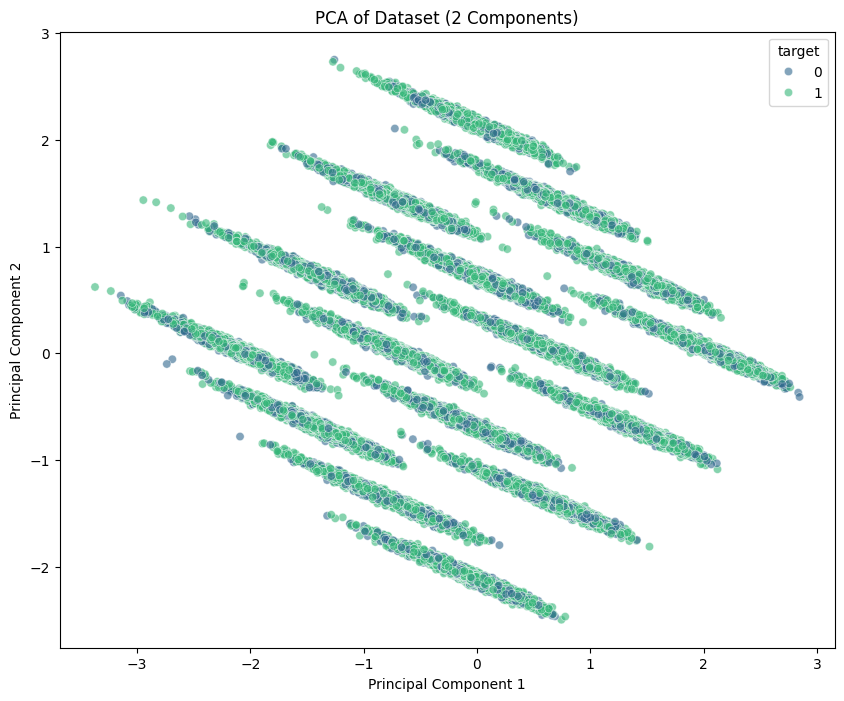

In [9]:
# Visualize the PCA results (2D plot for simplicity)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=X_pca_df, palette='viridis', alpha=0.6)
plt.title('PCA of Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
# Explain the variance ratio
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)
print("\nTotal explained variance ratio:")
print(pca.explained_variance_ratio_.sum())

Explained variance ratio by each component:
[0.05815724 0.05713237 0.05609731]

Total explained variance ratio:
0.1713869249383844


## Feature selection(importance) using model based method

Why use model-based feature importance?

1. Direct link to prediction

    * Model-based feature importance tells you which features the model actually relies on to make predictions, instead of just guessing from correlations or statistics.

2. Captures complex relationships

    * Simple methods (like correlation) only see linear patterns.

    * Models (like Random Forest, XGBoost, Logistic Regression) can catch non-linear interactions and feature combinations that matter.

3. Avoids wasted features

    * Some features don’t help the model (they might be noisy, redundant, or irrelevant).

    * By ranking features, you can drop the weak ones and keep only the strong predictors → faster training, less overfitting, better accuracy.

In [11]:
# here we are going to use randomforest classifier as our model for find feature importance
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances (Model-Based - RandomForest):")
print(sorted_feature_importances)

Feature Importances (Model-Based - RandomForest):
glucose                      0.039443
heart_rate                   0.039232
insulin                      0.039226
cholesterol                  0.039094
sugar_intake                 0.039058
waist_size                   0.039040
daily_steps                  0.038951
calorie_intake               0.038906
daily_supplement_dosage      0.038859
blood_pressure               0.038843
height                       0.038561
water_intake                 0.038412
income                       0.038109
screen_time                  0.038083
work_hours                   0.037914
sleep_hours                  0.037723
work_sleep_balance           0.037573
bmi                          0.036987
weight                       0.036726
physical_activity            0.036494
age                          0.032204
mental_health_score          0.021426
stress_level                 0.021378
meals_per_day                0.013918
education_level              0.011830


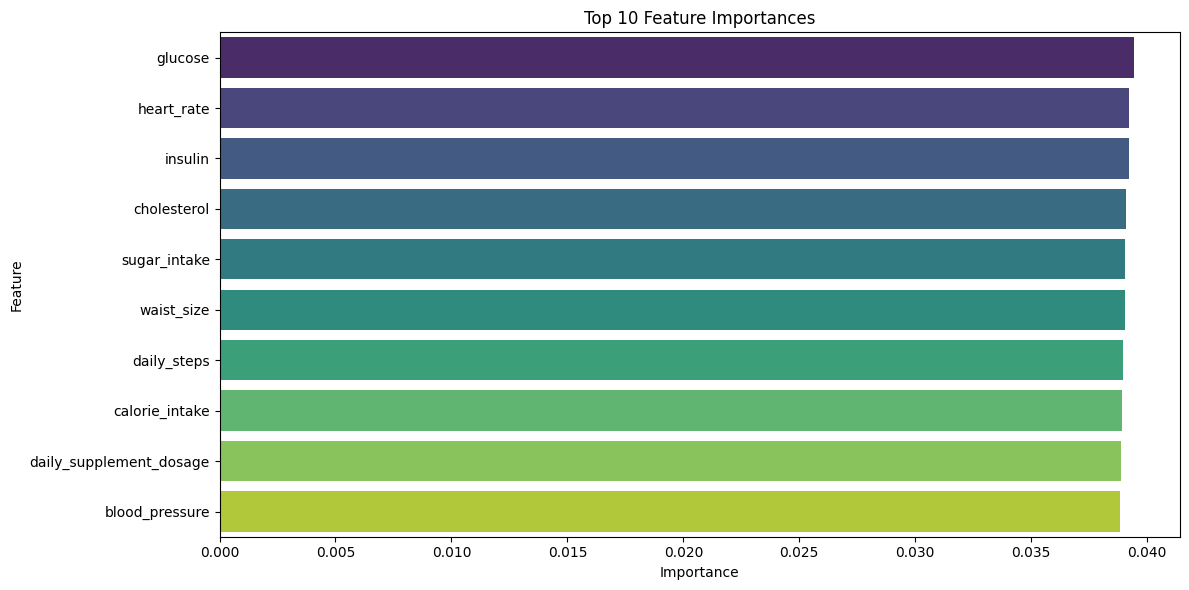

In [12]:
# Visualize the top N feature importances (e.g., top 10)
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.head(top_n).values, y=sorted_feature_importances.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Final dataset creation after feature importance

In [99]:
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24101992.csv')

In [100]:
data_df=pd.DataFrame(data)

In [101]:
data_df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,daily_supplement_dosage,target,work_sleep_balance
0,0.258065,Male,0.255070,-0.649144,-0.659878,-0.783060,-0.088073,-1.201575,0.606505,0.113628,...,High,Poor,No,High,1.0,No,Yes,-0.227479,healthy,0.077533
1,0.677419,Female,-0.508451,1.383626,1.572852,0.040388,-0.106204,-0.718725,-1.828303,0.627273,...,Moderate,Moderate,No,High,1.0,Yes,No,0.622583,healthy,-0.030493
2,-0.064516,Male,0.544123,0.533403,0.187680,0.328247,0.163743,0.090790,-1.277666,-0.397464,...,High,Good,Yes,High,0.5,No,No,0.541159,healthy,-0.237313
3,-0.516129,Female,0.156681,-0.338304,-0.358521,0.954038,1.477934,-0.522819,0.321508,1.051240,...,Low,Moderate,No,High,-1.0,No,Yes,0.837151,healthy,1.328451
4,0.387097,Female,-0.478429,-1.488155,-1.158171,-0.975776,1.605675,1.467556,0.257302,-0.189262,...,Low,Moderate,Yes,High,-1.0,Yes,Yes,0.032898,healthy,-0.437060


In [102]:
accepted_features=['age','gender','height','weight','bmi','waist_size','blood_pressure','glucose','heart_rate','insulin','cholesterol','sugar_intake',
                   'daily_steps','calorie_intake','daily_supplement_dosage','water_intake','income','work_hours','sleep_hours','work_sleep_balance',
                   'stress_level','job_type','target']

In [103]:
data_df=data_df[accepted_features]

In [104]:
data_df.columns

Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'glucose', 'heart_rate', 'insulin', 'cholesterol',
       'sugar_intake', 'daily_steps', 'calorie_intake',
       'daily_supplement_dosage', 'water_intake', 'income', 'work_hours',
       'sleep_hours', 'work_sleep_balance', 'stress_level', 'job_type',
       'target'],
      dtype='object')

In [105]:
print(len(accepted_features))
print(len(data_df.columns))

23
23


In [106]:
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features=data_df.select_dtypes(include=['object']).columns.tolist()

In [107]:
categorical_features.remove('target')

In [108]:
from sklearn.preprocessing import  OneHotEncoder
onehot=OneHotEncoder(sparse_output=False)

In [109]:
print(categorical_features)

['gender', 'job_type']


In [110]:
onehot.fit(data_df[categorical_features])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [111]:
transformed_data=onehot.transform(data_df[categorical_features])

In [112]:
data_df.drop(categorical_features,axis=1,inplace=True)

In [113]:
onehot_feature_names = []
for i, col in enumerate(categorical_features):
  for cat in onehot.categories_[i]:
    onehot_feature_names.append(f'{col}_{cat}')

# Create a DataFrame from the transformed data
transformed_one_hot_df = pd.DataFrame(transformed_data, columns=onehot_feature_names, index=data_df.index)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
data_df = pd.concat([data_df, transformed_one_hot_df], axis=1)

In [114]:
data_df.columns

Index(['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure',
       'glucose', 'heart_rate', 'insulin', 'cholesterol', 'sugar_intake',
       'daily_steps', 'calorie_intake', 'daily_supplement_dosage',
       'water_intake', 'income', 'work_hours', 'sleep_hours',
       'work_sleep_balance', 'stress_level', 'target', 'gender_Female',
       'gender_Male', 'job_type_Healthcare', 'job_type_Labor',
       'job_type_Office', 'job_type_Service', 'job_type_Tech',
       'job_type_Unemployed'],
      dtype='object')

In [118]:
data_df.to_csv('final_dataset.csv',index=False)